### Loading packages from config/init.py

In [1]:
%run ../config/init.py

### Defining variables

In [2]:
QUERY_SIZES = [2000, 6000, 10000]
NO_FILES = 20
TRANSCRIPTOME_FILE = os.path.join(DATA, DATASET, 'transcriptome.fasta.gz')

### Creating 20 FASTA files for the different query sizes

In [3]:
result_dir = os.path.join(RESULTS, DATASET)
if not os.path.exists(result_dir):
    os.mkdir(result_dir) 
os.chdir(result_dir)

### Transcriptome length distribution

In [4]:
data = []
records = {}
with gzip.open(TRANSCRIPTOME_FILE, "rt") as handle:
    for record in SeqIO.parse(handle, "fasta"): 
        records[record.id] = record
        data.append([record.id, len(record.seq)])
df = pandas.DataFrame(data, columns=['id', 'length'])
print('{} transcripts loaded'.format(len(df)))

474563 transcripts loaded


,count,mean,std,min,25%,50%,75%,max
length,474563.0,457.274838,421.283688,201.0,239.0,305.0,469.0,15073.0


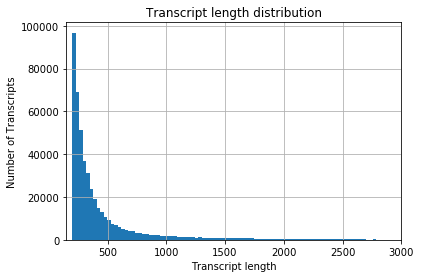

In [33]:
hist = df.hist(bins=500)
hist[0][0].set_title('Transcript length distribution')
hist[0][0].set_xlabel('Transcript length')
hist[0][0].set_ylabel('Number of Transcripts')
hist[0][0].set_xlim((150,3000))
display(df.describe().T)

### Random sampling of 20 files with 2k, 6k, and 10k transcripts

In [5]:
def sample_data_by_no_files(df, size, no_files, result_dir):
    d = df.copy()
    stats = pandas.DataFrame()
    for i in range(1, no_files + 1):
        s = d.sample(n=size)
        d = d.drop(s.index)
        st = s.describe().T
        st.rename(index={'length': str(i)}, inplace=True)
        stats = pandas.concat([stats, st])
        with open(os.path.join(result_dir, str(size) + '_' + str(i) + '.fa'), "w") as output_handle :
            for id in s['id']:
                SeqIO.write(records[id], output_handle, "fasta")
                
    return stats

In [6]:
for q in QUERY_SIZES:
    outdir = os.path.join(str(q), 'fasta')
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    
    stats = sample_data_by_no_files(df, q, 20, outdir)
    display(stats)

,count,mean,std,min,25%,50%,75%,max
1,2000.0,474.9290,435.046844,201.0,241.00,317.0,492.25,4149.0
2,2000.0,474.0875,443.769761,201.0,240.00,307.0,479.00,3804.0
3,2000.0,453.2255,403.715745,201.0,237.00,307.0,480.00,4626.0
4,2000.0,450.9555,437.340455,201.0,238.00,296.0,458.25,8093.0
5,2000.0,457.0875,427.297560,201.0,236.00,296.0,471.00,3649.0
6,2000.0,455.9005,415.904205,201.0,240.00,305.0,467.25,4133.0
7,2000.0,451.5975,391.476577,201.0,240.00,307.0,476.25,3714.0
8,2000.0,459.9600,413.949301,201.0,239.00,307.0,480.00,3452.0
9,2000.0,456.0575,404.279551,201.0,244.00,311.0,470.25,4314.0
10,2000.0,449.8155,410.587125,201.0,236.00,295.5,470.25,3939.0


,count,mean,std,min,25%,50%,75%,max
1,6000.0,460.232833,423.799473,201.0,240.0,306.0,474.00,4218.0
2,6000.0,459.470333,428.329322,201.0,239.0,303.0,464.25,4130.0
3,6000.0,461.325500,427.560730,201.0,240.0,310.0,470.25,4650.0
4,6000.0,454.835500,416.077638,201.0,237.0,304.0,463.00,4984.0
5,6000.0,450.563500,412.203902,201.0,240.0,302.0,454.25,3876.0
6,6000.0,452.265167,410.773682,201.0,239.0,305.0,465.00,5712.0
7,6000.0,461.851833,437.239385,201.0,240.0,306.0,469.00,6416.0
8,6000.0,449.171167,406.870906,201.0,238.0,304.0,463.25,3899.0
9,6000.0,453.508667,412.203826,201.0,240.0,304.0,463.00,4347.0
10,6000.0,458.131833,412.292092,201.0,238.0,307.0,474.00,4482.0


,count,mean,std,min,25%,50%,75%,max
1,10000.0,456.0059,417.883279,201.0,240.0,302.0,467.00,4482.0
2,10000.0,453.4927,410.368171,201.0,239.0,305.0,464.00,4145.0
3,10000.0,463.2189,435.228763,201.0,239.0,306.0,475.00,8093.0
4,10000.0,459.8047,423.476756,201.0,240.0,307.0,473.00,5182.0
5,10000.0,456.4745,420.534625,201.0,237.0,305.0,468.00,4751.0
6,10000.0,458.3019,426.953537,201.0,239.0,304.0,462.00,5712.0
7,10000.0,459.0642,417.359324,201.0,239.0,307.0,475.00,8092.0
8,10000.0,455.5943,427.247162,201.0,239.0,305.0,457.00,5909.0
9,10000.0,456.6351,417.267424,201.0,240.0,307.0,466.00,4784.0
10,10000.0,450.9014,412.314690,201.0,238.0,302.0,461.00,6178.0


### Random sampling 120k transcripts using query sizes of 2k, 6k and 10k

In [26]:
result_dir = os.path.join(RESULTS, DATASET, '120k')
if not os.path.exists(result_dir):
    os.mkdir(result_dir) 
os.chdir(result_dir)

In [27]:
def sample_data_by_size(df, size, result_dir):
    d = df.copy()
    stats = pandas.DataFrame()
    i = 1
    while not d.empty:
        if len(d) > size:
            s = d.sample(n=size)
            d = d.drop(s.index)
        else:
            s = d
            d = pandas.DataFrame()
        st = s.describe().T
        st.rename(index={'length': str(i)}, inplace=True)
        stats = pandas.concat([stats, st])
        with open(os.path.join(result_dir, str(size) + '_' + str(i) + '.fa'), "w") as output_handle :
            for id in s['id']:
                SeqIO.write(records[id], output_handle, "fasta")
        i += 1
                
    return stats

In [28]:
df = df.sample(n=120000)
for q in QUERY_SIZES:
    outdir = os.path.join(str(q), 'fasta')
    if not os.path.exists(outdir):
        os.makedirs(outdir)
    
    stats = sample_data_by_size(df, q, outdir)
    display(stats)

,count,mean,std,min,25%,50%,75%,max
1,2000.0,452.0110,415.723152,201.0,239.00,302.0,463.00,3381.0
2,2000.0,450.7800,417.583482,201.0,237.00,306.5,462.25,3591.0
3,2000.0,451.9415,427.049089,201.0,239.00,299.0,465.00,4151.0
4,2000.0,478.5405,453.015041,201.0,237.00,310.0,499.25,4325.0
5,2000.0,446.7495,409.359101,201.0,235.00,298.5,454.25,3366.0
6,2000.0,456.5630,417.554642,201.0,240.00,306.0,466.50,4351.0
7,2000.0,451.6445,401.342564,201.0,242.00,306.0,459.00,4708.0
8,2000.0,461.7280,416.125855,201.0,239.00,309.0,475.25,3851.0
9,2000.0,457.8935,430.090432,201.0,239.00,305.0,465.00,4329.0
10,2000.0,453.1980,422.312827,201.0,239.75,307.0,444.25,4502.0


,count,mean,std,min,25%,50%,75%,max
1,6000.0,457.510667,423.011536,201.0,240.0,307.0,466.00,4325.0
2,6000.0,454.594333,413.292025,201.0,237.0,304.0,467.00,4455.0
3,6000.0,459.778000,420.340135,201.0,239.0,307.0,472.00,4408.0
4,6000.0,452.017667,396.117064,201.0,242.0,310.0,475.25,4193.0
5,6000.0,461.027000,436.858712,201.0,239.0,306.0,460.00,8092.0
6,6000.0,459.048667,421.160537,201.0,239.0,307.0,476.00,5186.0
7,6000.0,459.533500,429.313197,201.0,240.0,305.0,466.00,4167.0
8,6000.0,456.292833,415.892143,201.0,238.0,305.0,470.25,4708.0
9,6000.0,466.352667,436.635794,201.0,239.0,308.0,474.00,5289.0
10,6000.0,454.021000,414.386849,201.0,238.0,305.0,464.00,4637.0


,count,mean,std,min,25%,50%,75%,max
1,10000.0,459.4128,417.451282,201.0,238.0,305.0,475.00,4668.0
2,10000.0,457.6165,431.430133,201.0,239.0,305.0,468.00,5835.0
3,10000.0,452.4579,405.541830,201.0,238.0,306.0,469.00,4637.0
4,10000.0,462.3885,431.310862,201.0,240.0,306.0,469.00,4708.0
5,10000.0,454.8620,415.695067,201.0,239.0,306.0,469.00,4482.0
6,10000.0,456.1679,418.260004,201.0,239.0,308.0,466.00,5186.0
7,10000.0,458.0226,410.206656,201.0,240.0,309.0,473.00,4069.0
8,10000.0,458.2315,429.147068,201.0,239.0,305.0,468.00,6128.0
9,10000.0,453.6512,423.229015,201.0,238.0,303.0,454.00,4251.0
10,10000.0,462.8033,438.666668,201.0,237.0,306.0,476.25,8092.0
